<a href="https://colab.research.google.com/github/Zunedh/Task/blob/main/Task1_forecasting_the_sales_of_a_supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Kolimi Mohammad Zunedh

Bharath Intern

Business Analytics

Task 1 :Forecasting the sales of a supermarket

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [ ]:
superstore=pd.read_csv('train.csv')
superstore.shape

(9800, 18)

In [ ]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
superstore.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
superstore.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


<Axes: ylabel='Ship Mode'>

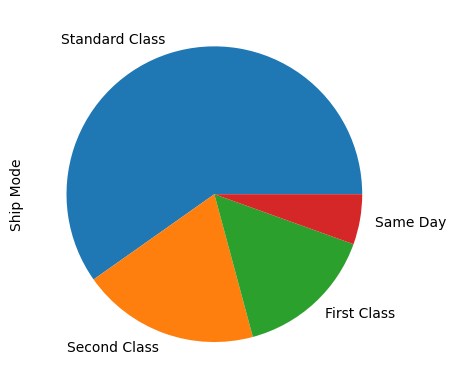

In [ ]:
superstore["Ship Mode"].value_counts().plot.pie()

<Axes: ylabel='Segment'>

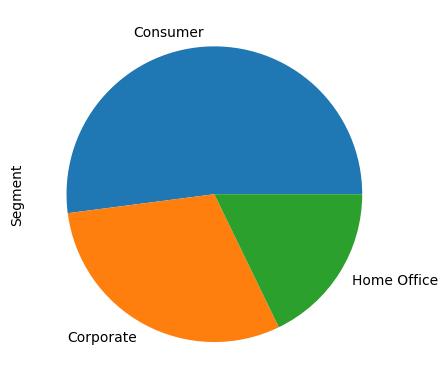

In [ ]:
superstore["Segment"].value_counts().plot.pie()

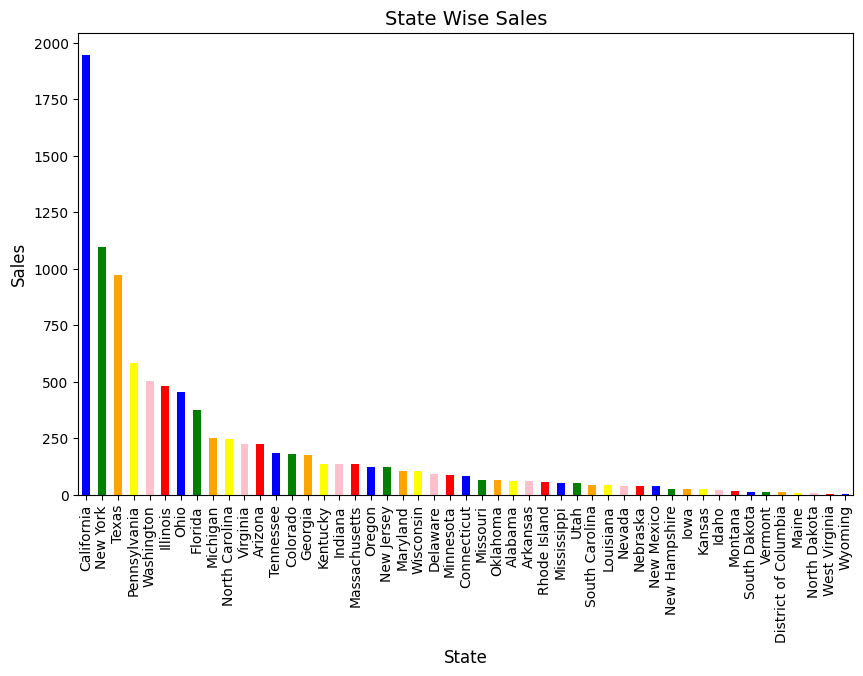

In [ ]:
state_counts = superstore['State'].value_counts()
colors =['blue','green','orange','yellow','pink','red']
plt.figure(figsize=(10,6))
plt.xticks(rotation='vertical')
state_counts.plot(kind='bar',color=colors)
plt.xlabel("State", fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.title('State Wise Sales',fontsize=14)
plt.show()

In [ ]:
superstore["Order Date"] = pd.DatetimeIndex(superstore["Order Date"])
superstore["Ship Date"] = pd.DatetimeIndex(superstore["Ship Date"])

<ipython-input-19-ac71ee24492a>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore["Order Date"] = pd.DatetimeIndex(superstore["Order Date"])
<ipython-input-19-ac71ee24492a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore["Ship Date"] = pd.DatetimeIndex(superstore["Ship Date"])


In [ ]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
def check(superstore):
    l = []
    columns = superstore.columns
    for col in columns:
        dtypes = superstore[col].dtypes
        nunique = superstore[col].nunique()
        sum_null = superstore[col].isnull().sum()

        l.append([col, dtypes, nunique, sum_null])

    superstore_check = pd.DataFrame(l, columns=['column', 'dtypes', 'nunique', 'sum_null'])
    return superstore_check
check(superstore)

,column,dtypes,nunique,sum_null
0,Row ID,int64,9800,0
1,Order ID,object,4922,0
2,Order Date,datetime64[ns],1230,0
3,Ship Date,datetime64[ns],1326,0
4,Ship Mode,object,4,0
5,Customer ID,object,793,0
6,Customer Name,object,793,0
7,Segment,object,3,0
8,Country,object,1,0
9,City,object,529,0


In [ ]:
superstore[superstore["Postal Code"].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
superstore['Postal Code']=superstore['Postal Code'].fillna(5401.0)

<Axes: >

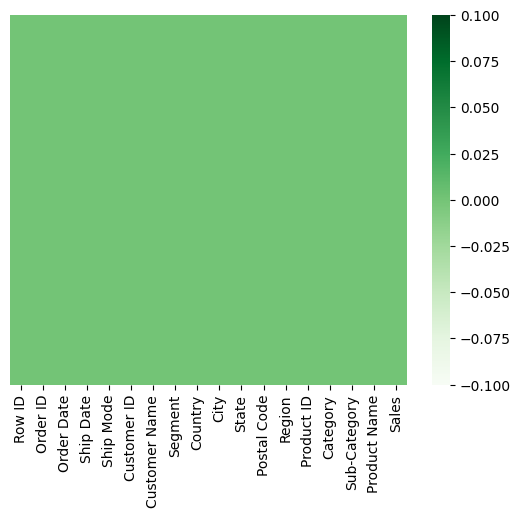

In [ ]:
sns.heatmap(superstore.isnull(),yticklabels= False,cbar="False" ,cmap="Greens")

In [ ]:
superstore['Year'] = pd.DatetimeIndex(superstore['Order Date']).year
superstore['Month'] = pd.DatetimeIndex(superstore['Order Date']).month
superstore['Day'] = pd.DatetimeIndex(superstore['Order Date']).day

In [ ]:
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore['Day of week'] = superstore['Order Date'].dt.strftime('%A')

array([[<Axes: title={'center': 'Order Date'}>,
        <Axes: title={'center': 'Ship Date'}>],
       [<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>]], dtype=object)

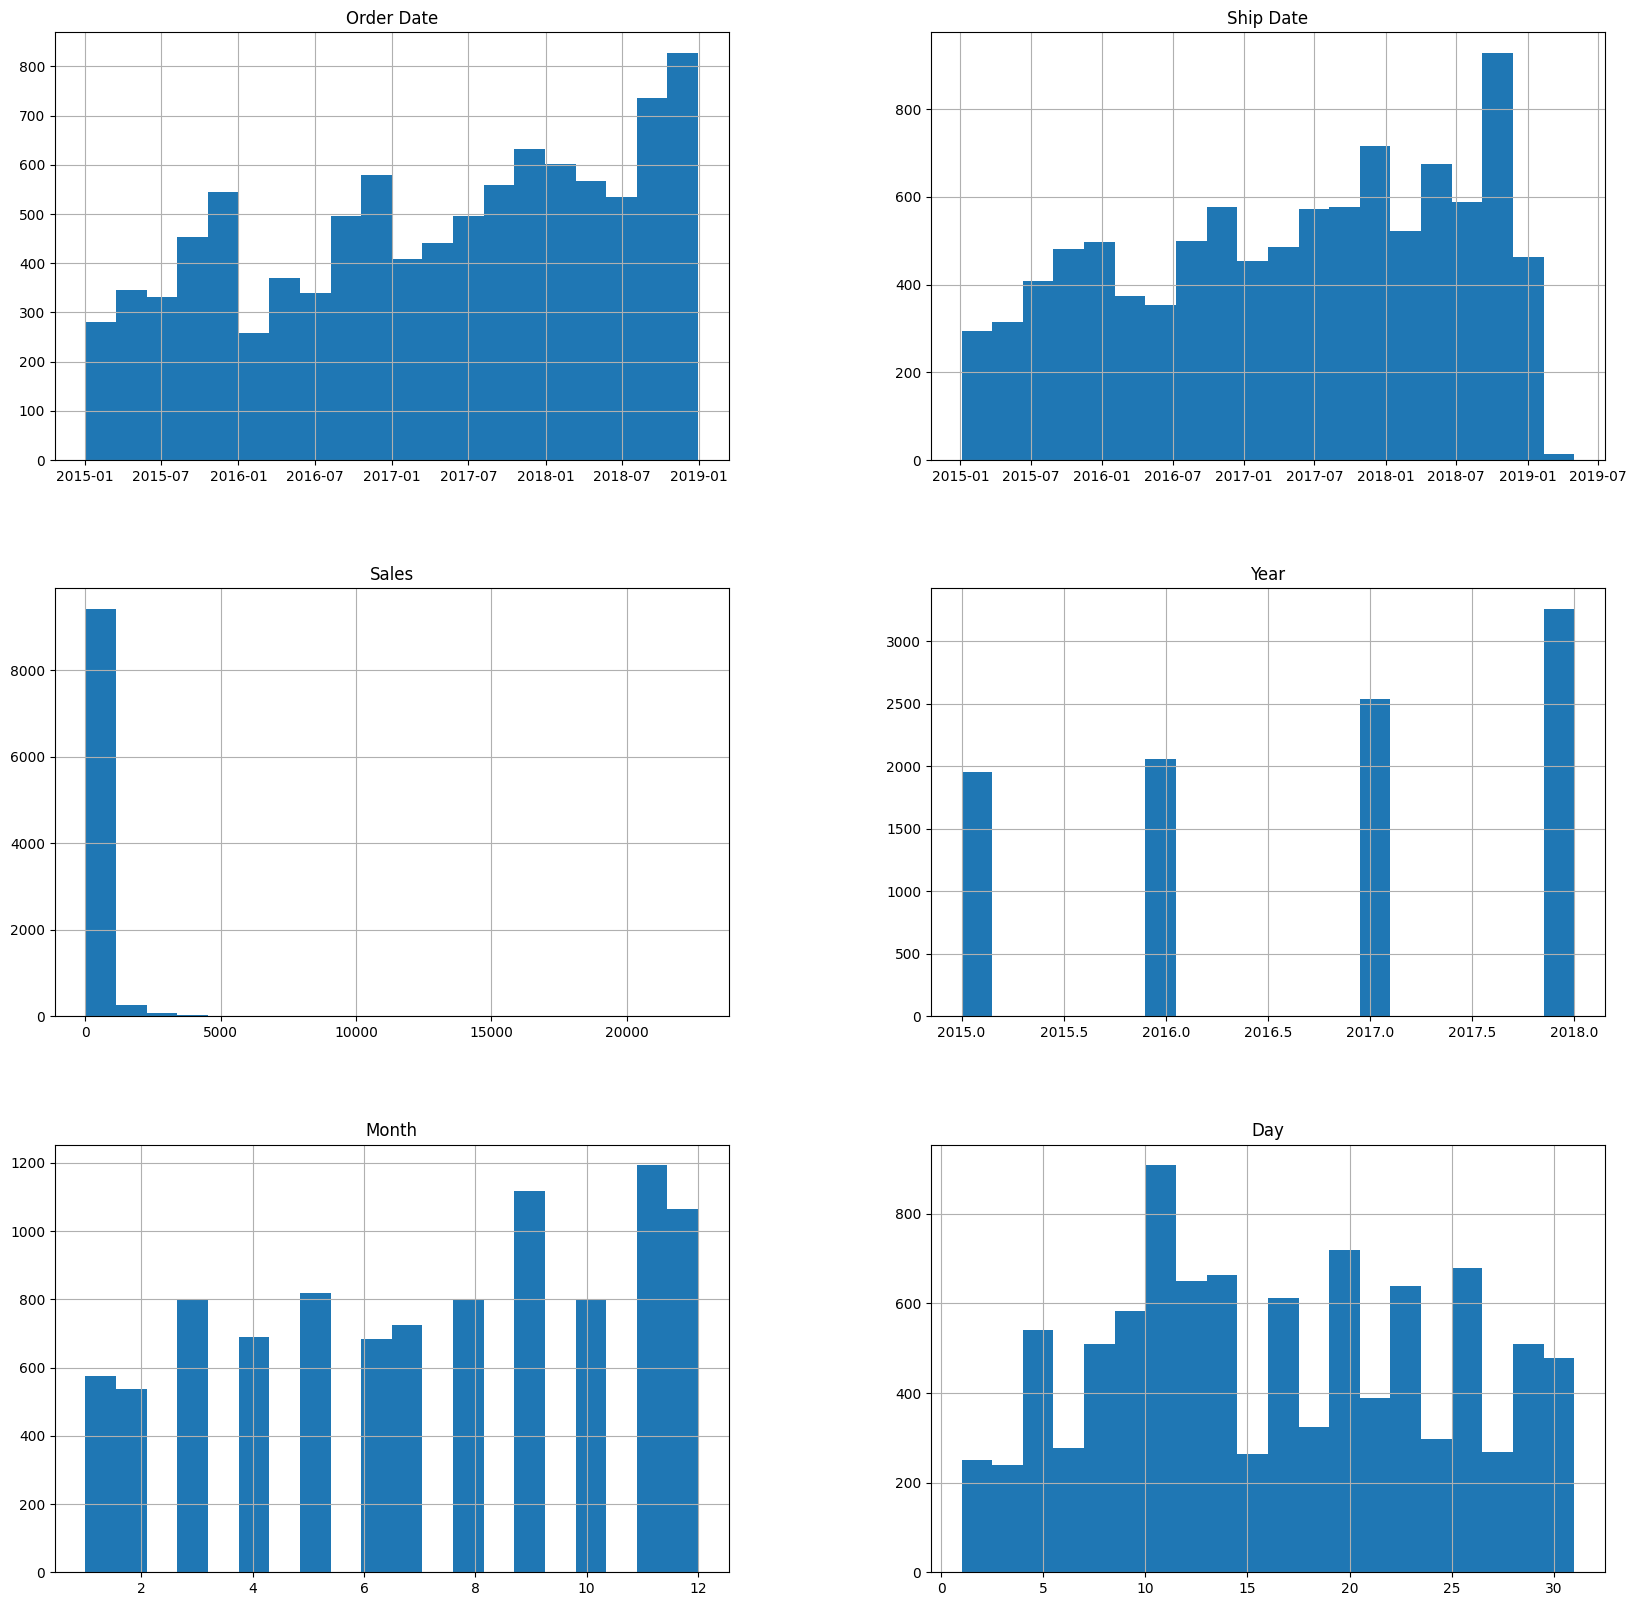

In [ ]:
superstore[['Order Date' ,'Ship Date' , 'Sales' , 'Year' ,'Month' ,'Day']].hist(bins=20 ,figsize =(20,20))

In [ ]:
best_cities = superstore.pivot_table(values = "Sales" ,index='City',aggfunc='sum')
best_cities = best_cities.sort_values(by=['Sales'], ascending=False).head(20)
best_cities.reset_index(inplace=True)
best_cities['Sales']=best_cities['Sales'].round(2)
best_cities

,City,Sales
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


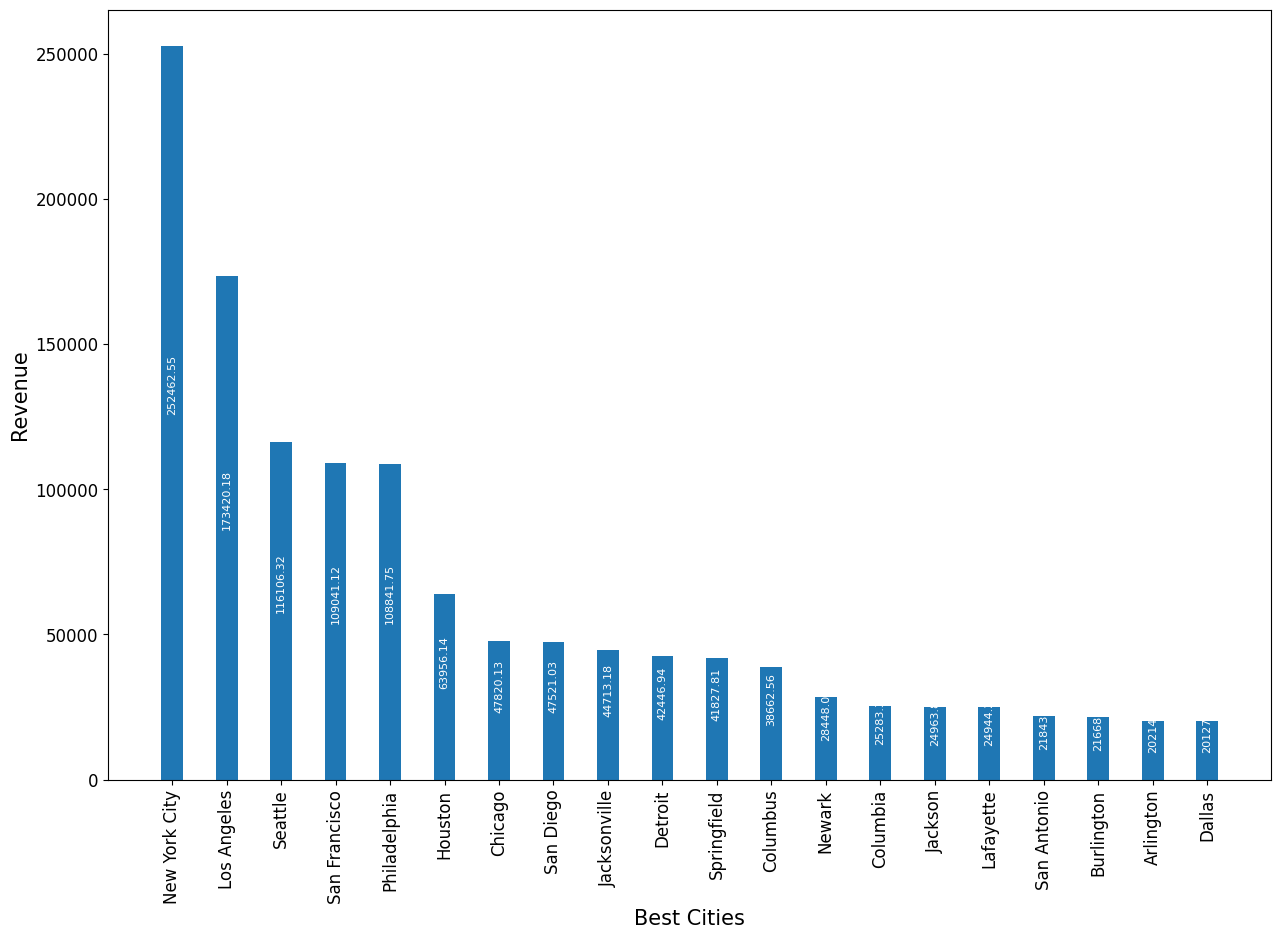

In [ ]:
fig =plt.figure(figsize = (15,10))
plt.bar(best_cities['City'],best_cities['Sales'],width = 0.4)

plt.xlabel("Best Cities",fontsize=15)
plt.ylabel('Revenue',fontsize=15)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_cities['Sales']):
  plt.text(i,v/2,str(v),ha='center', rotation=90,color='white',fontsize=8)
plt.show()

In [ ]:
best_dayofweek = superstore.pivot_table(values = "Sales", index = "Day of week", aggfunc = "sum")
best_dayofweek = best_dayofweek.sort_values (by=['Sales'], ascending=False).head (20)

best_dayofweek.reset_index(inplace=True)

best_dayofweek[ 'Sales']=best_dayofweek ['Sales'].round(2)
best_dayofweek

,Day of week,Sales
0,Saturday,394511.12
1,Tuesday,369922.11
2,Monday,355652.72
3,Wednesday,332748.51
4,Sunday,322770.80
5,Friday,257430.36
6,Thursday,228501.16


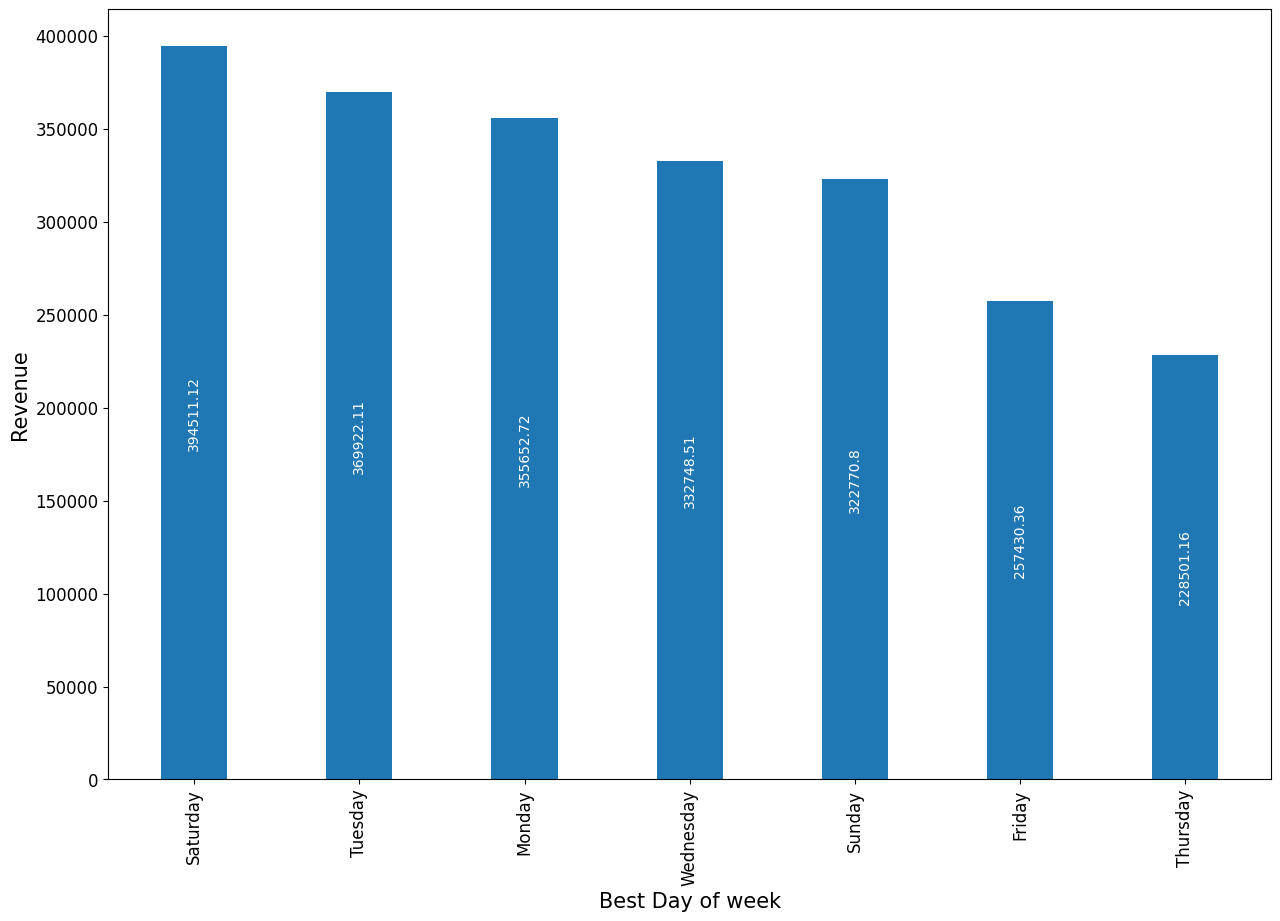

In [ ]:
fig = plt.figure(figsize = (15, 10))


plt.bar(best_dayofweek[ 'Day of week'], best_dayofweek [ 'Sales'], width = 0.4)

plt.xlabel("Best Day of week", fontsize=15)

plt.ylabel("Revenue", fontsize=15)

plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for i, v in enumerate (best_dayofweek['Sales']):
   plt.text(i, v/2, str(v), ha='center', va='center', rotation=90, color='white')

plt.show()

In [ ]:
best_category =superstore.pivot_table(values = "Sales", index = "Category", aggfunc = "sum")

best_category = best_category.sort_values(by =['Sales'], ascending=False).head()

best_category.reset_index(inplace=True)

best_category['Sales' ]=best_category['Sales'].round(2)

best_category

,Category,Sales
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


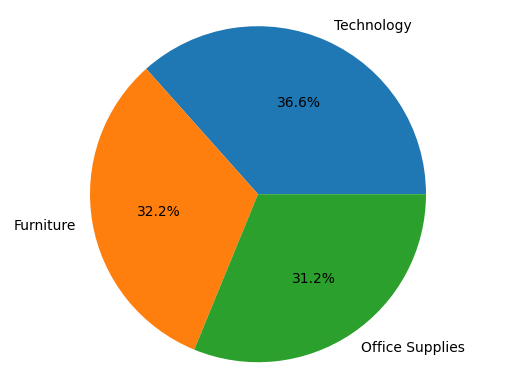

In [ ]:
plt.pie (best_category['Sales'], labels=best_category['Category'], autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Technology has the highest sales

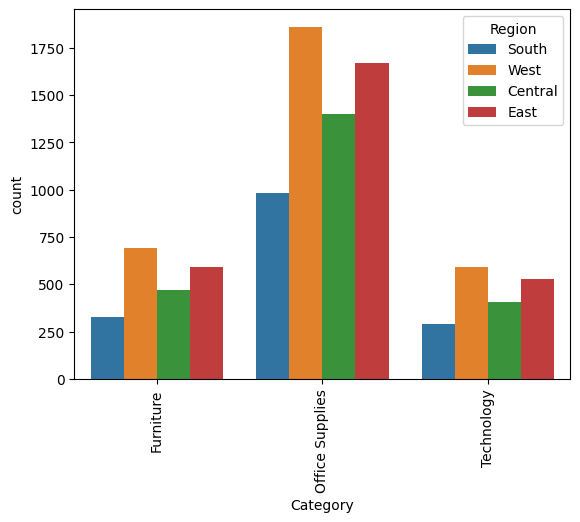

In [ ]:
sns.countplot(data=superstore,x="Category", hue='Region')

plt.xticks(rotation=90)

plt.show()

Office Supplies has the most sales

<Figure size 640x480 with 0 Axes>

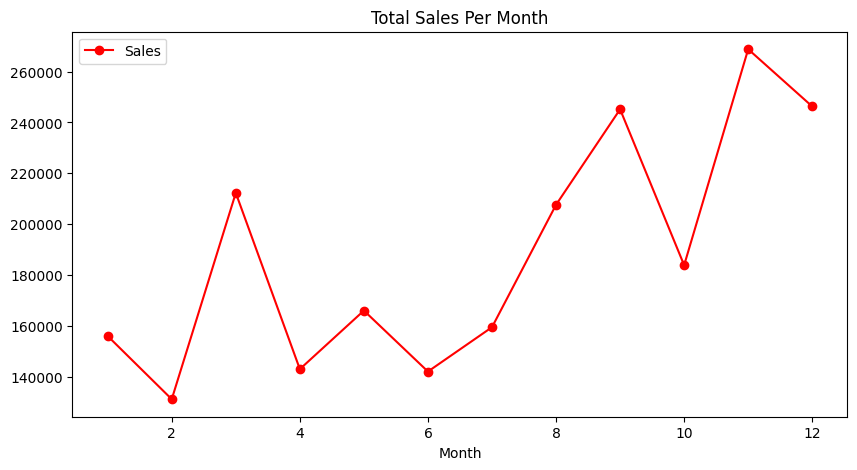

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
axis = superstore.groupby('Month')[['Sales']].sum().plot(figsize =(10,5), marker= 'o', color ='red')

axis.set_title('Total Sales Per Month')
plt.figure()

<Figure size 640x480 with 0 Axes>

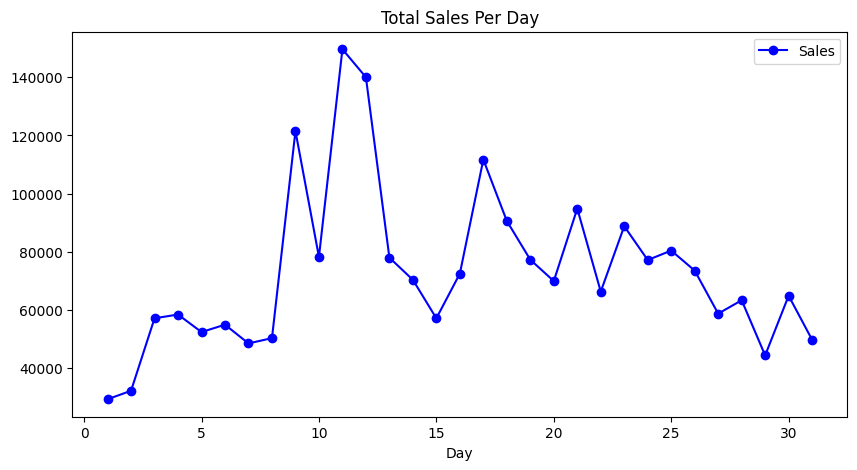

<Figure size 640x480 with 0 Axes>

In [ ]:
axis = superstore.groupby('Day')[['Sales']].sum().plot(figsize =(10,5), marker= 'o', color ='blue')

axis.set_title('Total Sales Per Day')
plt.figure()

<Figure size 640x480 with 0 Axes>

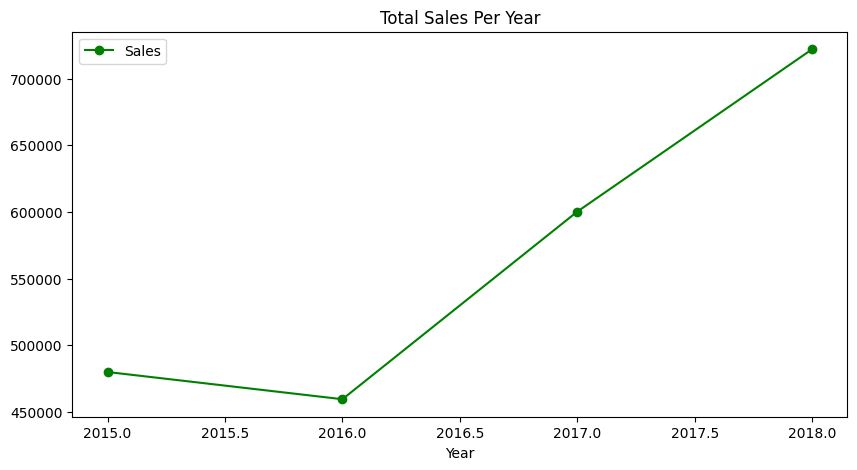

<Figure size 640x480 with 0 Axes>

In [ ]:
axis = superstore.groupby('Year')[['Sales']].sum().plot(figsize =(10,5), marker= 'o', color ='Green')

axis.set_title('Total Sales Per Year')
plt.figure()